### Dataset Overview:

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features in Dataset

1. Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns
2. Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
3. Cardiovascular Health: Examine blood pressure and heart rate measurements.
4. Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Dataset Columns:

1.  PersonID: An identifier for each individual.
2.  Gender: The gender of the person (Male/Female).
3.  Age: The age of the person in years.
4.  Occupation: Occupation or profession of person
5.  Sleep Duration (hours): The number of hours the person sleeps per day.
6.  Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7.  Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8.  Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9.  BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Details About Sleep Disorder Columns

1.  None: The individual does not exhibit any specific sleep disorder.
2.  Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
3.  Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing 
from sklearn.cluster import KMeans

data_file = 'data.csv'


In [2]:
data = pd.read_csv(data_file, index_col=0)
data.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
data.shape

(374, 12)

In [5]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [6]:
data.sample(20)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
106,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Insomnia
345,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
330,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
56,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
58,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
13,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
77,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea
73,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,NaN


In [7]:
# to check the missing value from the data above
data.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
data = data.drop_duplicates()
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None
360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
361,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [10]:
data_new = data.copy()

In [11]:
data_new['BMI Category'] = data_new['BMI Category'].replace('Normal Weight', 'Normal')
data_new

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None
360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
361,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [12]:
data_new.iloc[31]


Gender                       Male
Age                            33
Occupation                 Doctor
Sleep Duration                6.1
Quality of Sleep                6
Physical Activity Level        30
Stress Level                    8
BMI Category               Normal
Blood Pressure             125/80
Heart Rate                     72
Daily Steps                  5000
Sleep Disorder               None
Name: 71, dtype: object

In [13]:
data_new.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## Gender


   Gender  Count
0    Male     67
1  Female     65


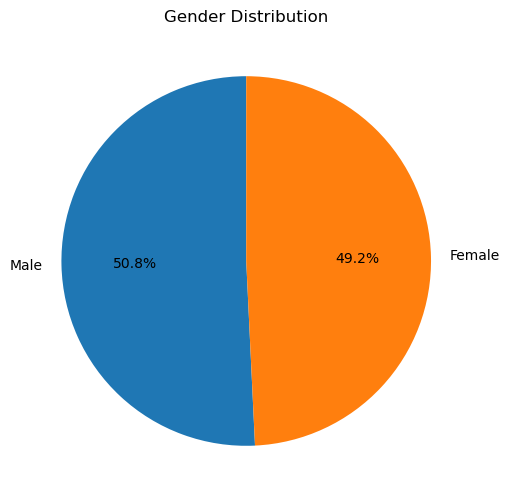

In [14]:
gender_count = data_new['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']  

# Mengecek struktur gender_count
print(gender_count.head()) 

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_count['Count'], labels=gender_count['Gender'], autopct='%1.1f%%', startangle=90)


plt.title('Gender Distribution')
plt.show()


## Sleep Disorder



In [15]:
data_new['Sleep Disorder'].describe()


count      132
unique       3
top       None
freq        73
Name: Sleep Disorder, dtype: object

In [16]:
sleep_disorder_counts = pd.crosstab(index=data_new['Sleep Disorder'], columns='count')

<Figure size 1000x600 with 0 Axes>

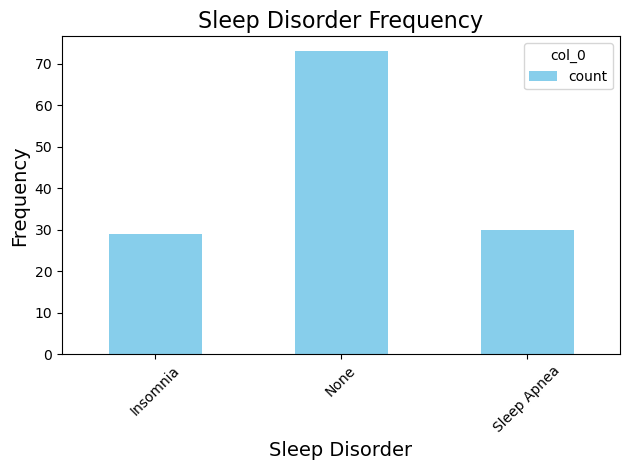

In [17]:
import matplotlib.pyplot as plt

# create rhe diagram
plt.figure(figsize=(10, 6))
sleep_disorder_counts.plot(kind='bar', color='skyblue')

# name the title and label, also set the size
plt.title('Sleep Disorder Frequency', fontsize=16)
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45) 

# show the diagram
plt.tight_layout() 
plt.show()


In [18]:
# check the sleep disorder n gender data
print(data_new['Sleep Disorder'].unique())
print(data_new['Gender'].unique())


['None' 'Sleep Apnea' 'Insomnia']
['Male' 'Female']


In [19]:
# relevancy between sleep disorder and gender
gender_sleep_disorder = pd.crosstab(index=data_new['Sleep Disorder'], columns=data_new['Gender'])

# show the data above
print(gender_sleep_disorder)


Gender          Female  Male
Sleep Disorder              
Insomnia            13    16
None                31    42
Sleep Apnea         21     9


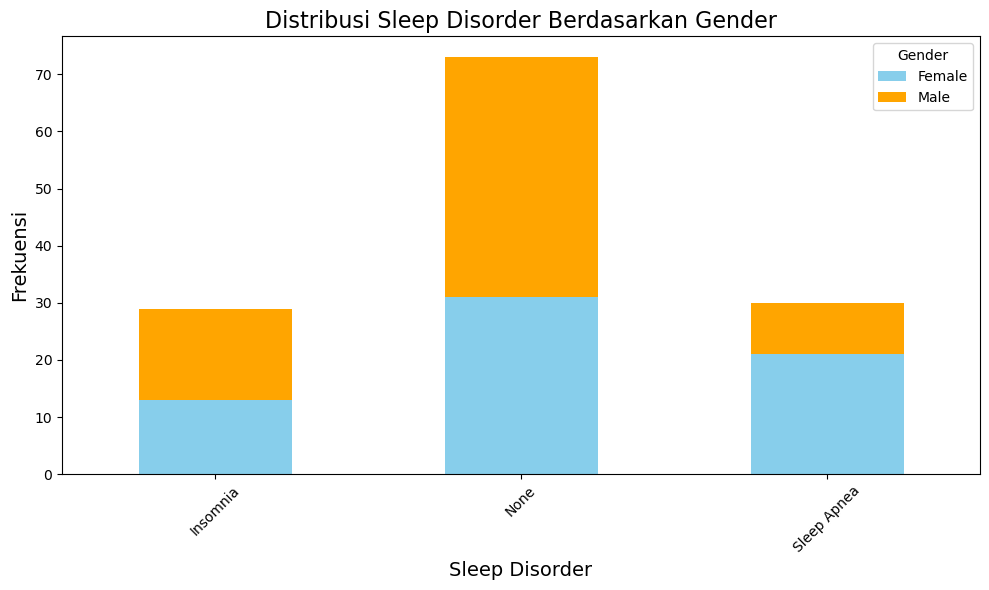

In [20]:
# stacked diagram to compare the perbandingan
gender_sleep_disorder.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))

# add title, label to mark the data and set the font size
plt.title('Distribusi Sleep Disorder Berdasarkan Gender', fontsize=16)
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=45)

# show the diagram
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


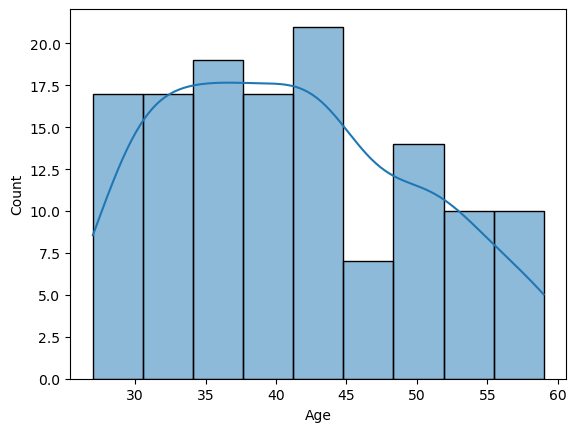

In [21]:
#visualize the 'age' diagram and add the curva (not necessaru) on the diagram
sns.histplot(data_new['Age'], kde=True)

#show the diagram (forgot the diagram type)
plt.show() 


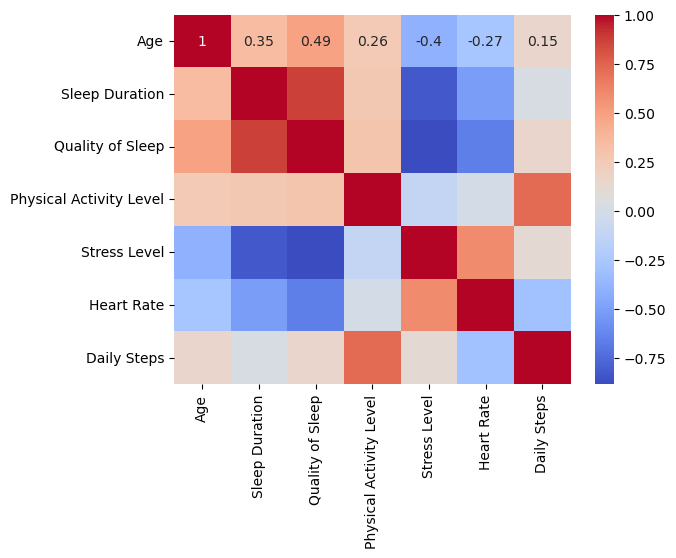

In [22]:
#select column w numeric data type
numerical_data = data.select_dtypes(include='number')

#hitung matrix from selected numeric data
corr_matrix = numerical_data.corr()

#create heatmap from the matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#to show the heatmao
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


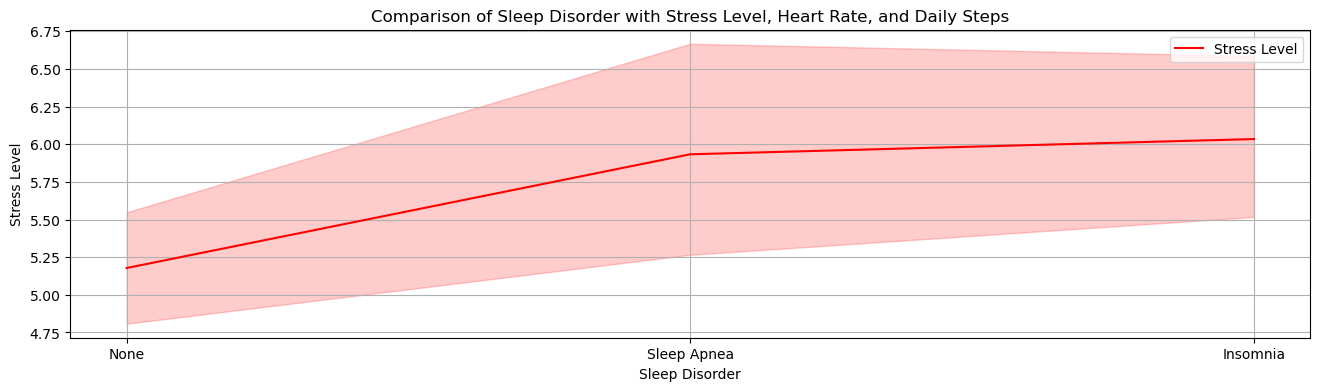

In [23]:
# Ukuran figure
plt.figure(figsize=(16, 4))

# Menggunakan parameter color untuk menentukan warna
sns.lineplot(data=data_new, x='Sleep Disorder', y='Stress Level', label='Stress Level', color='red')

plt.title('Comparison of Sleep Disorder with Stress Level, Heart Rate, and Daily Steps')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Sleep Duration 

In [24]:
#yauda jir
data_new.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,41.128788,7.082576,7.151515,58.393939,5.537879,71.204545,6637.878788
std,8.813942,0.775335,1.269037,20.468840,1.740428,4.867306,1766.288657
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,33.750000,6.400000,6.000000,44.250000,4.000000,68.000000,5000.000000
50%,41.000000,7.150000,7.000000,60.000000,6.000000,70.000000,7000.000000
75%,49.000000,7.725000,8.000000,75.000000,7.000000,74.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


<Axes: xlabel='Sleep Duration'>

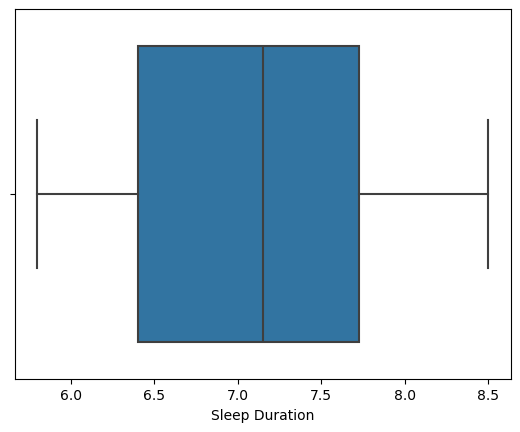

In [25]:
#edited tmrw
sns.boxplot(x=data_new['Sleep Duration'])


<Axes: xlabel='Sleep Duration', ylabel='Physical Activity Level'>

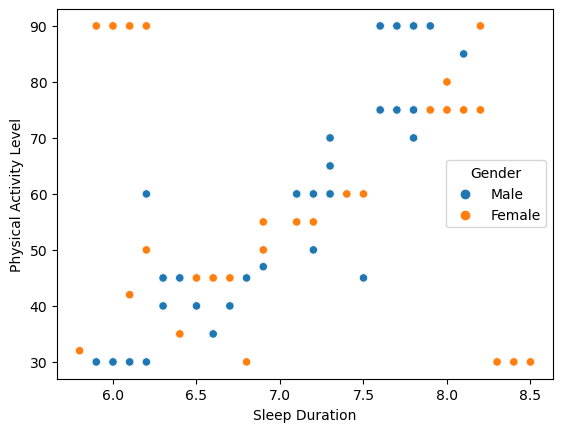

In [26]:
#ini jg
sns.scatterplot(x='Sleep Duration', y='Physical Activity Level', hue='Gender', data=data_new)

In [27]:
data_new["Age"].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

<Axes: xlabel='Sleep Duration', ylabel='Age'>

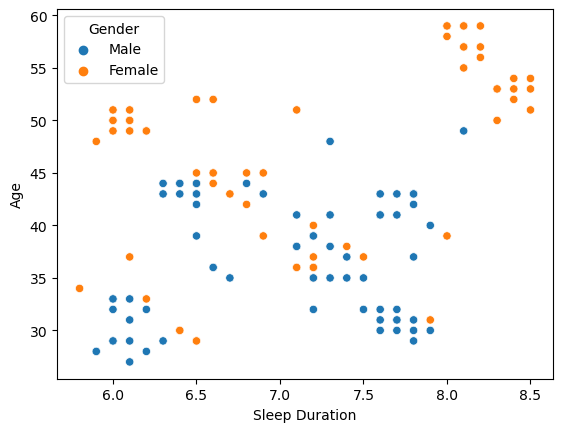

In [28]:
sns.scatterplot(x='Sleep Duration', y='Age', hue='Gender' ,data=data_new)

In [29]:
data_new.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [30]:
correlation = data_new[['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()
print(correlation['Sleep Duration'])

Age               0.348289
Sleep Duration    1.000000
Stress Level     -0.827969
Heart Rate       -0.508791
Daily Steps       0.019270
Name: Sleep Duration, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

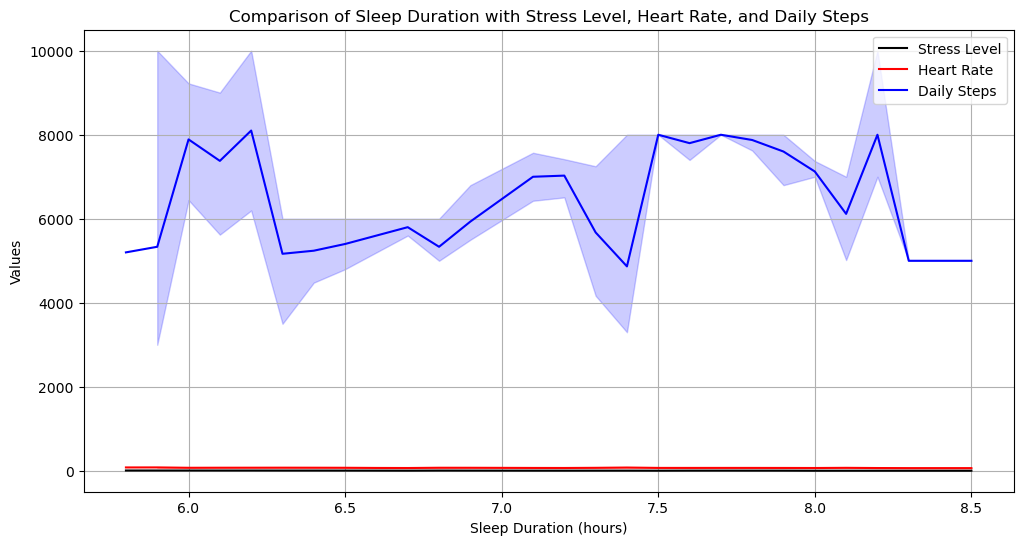

In [31]:
# Ukuran figure
plt.figure(figsize=(12, 6))

# Menggunakan parameter color untuk menentukan warna
sns.lineplot(data=data_new, x='Sleep Duration', y='Stress Level', label='Stress Level', color='black')
sns.lineplot(data=data_new, x='Sleep Duration', y='Heart Rate', label='Heart Rate', color='red')
sns.lineplot(data=data_new, x='Sleep Duration', y='Daily Steps', label='Daily Steps', color='blue')

plt.title('Comparison of Sleep Duration with Stress Level, Heart Rate, and Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


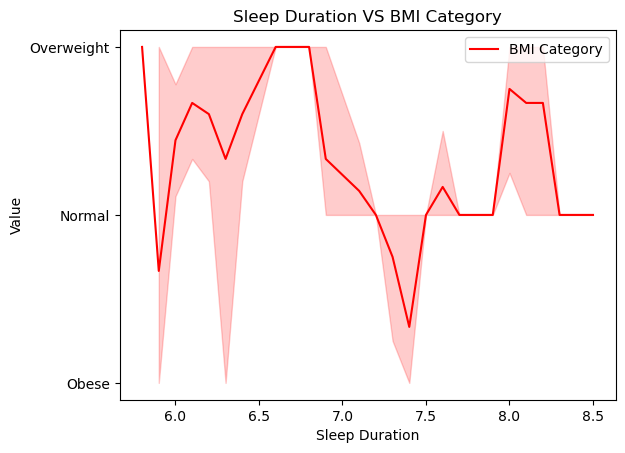

In [32]:
sns.lineplot(data=data_new, x='Sleep Duration', y='BMI Category', label='BMI Category', color='red')
plt.title('Sleep Duration VS BMI Category')
plt.xlabel('Sleep Duration')
plt.ylabel('Value')
plt.show()

<Figure size 1600x600 with 0 Axes>

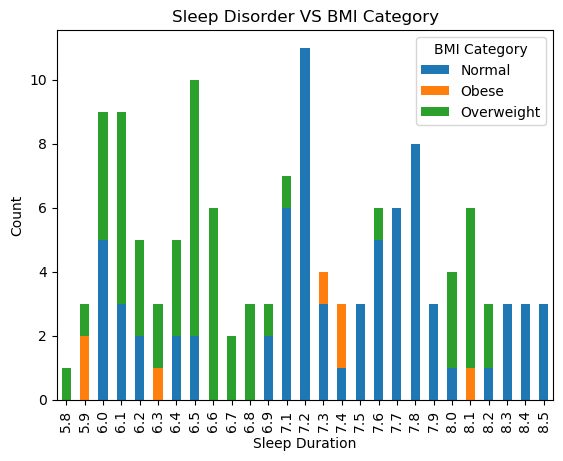

In [33]:

plt.figure(figsize=(16, 6))
pd.crosstab(data_new['Sleep Duration'], data_new['BMI Category']).plot(kind='bar', stacked=True)
plt.title('Sleep Disorder VS BMI Category')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()

### Occupation

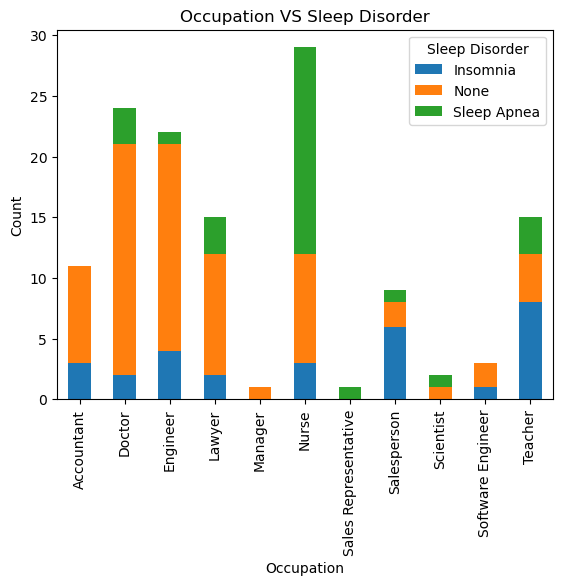

In [34]:
pd.crosstab(data_new['Occupation'], data_new['Sleep Disorder']).plot(kind='bar', stacked=True)
plt.title('Occupation VS Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

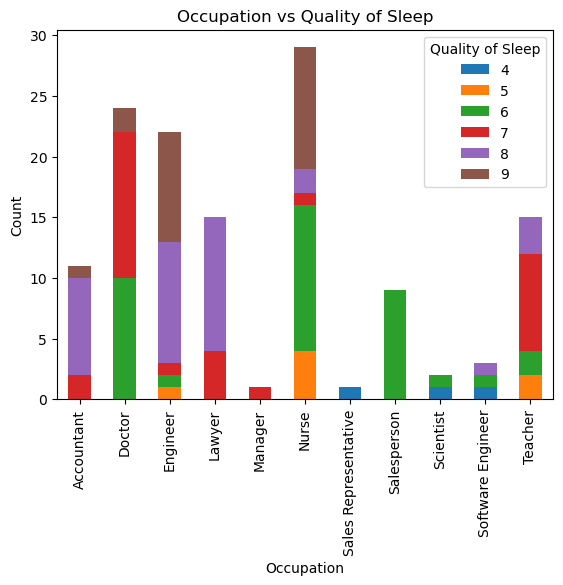

In [35]:
pd.crosstab(data_new['Occupation'], data_new['Quality of Sleep']).plot(kind='bar', stacked=True)

plt.title('Occupation vs Quality of Sleep')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


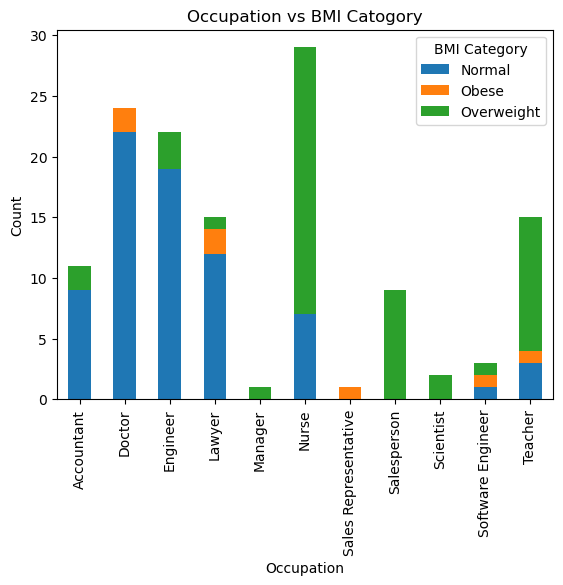

In [36]:
pd.crosstab(data_new['Occupation'], data_new['BMI Category']).plot(kind='bar', stacked=True)
plt.title('Occupation vs BMI Catogory')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

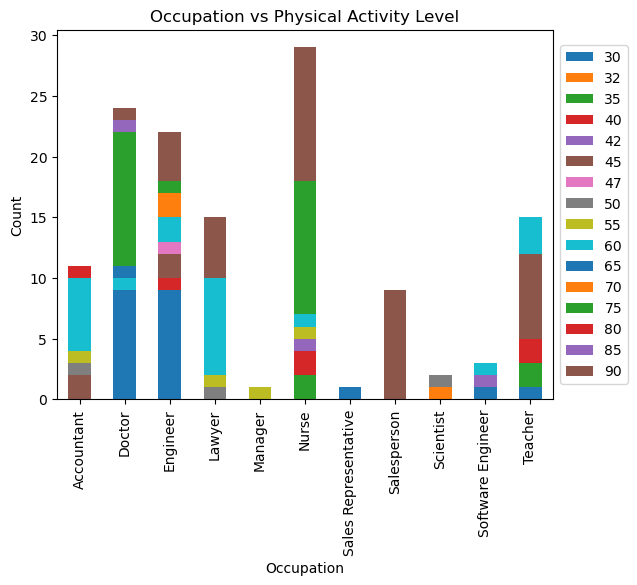

In [37]:
pd.crosstab(data_new['Occupation'], data_new['Physical Activity Level']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation vs Physical Activity Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


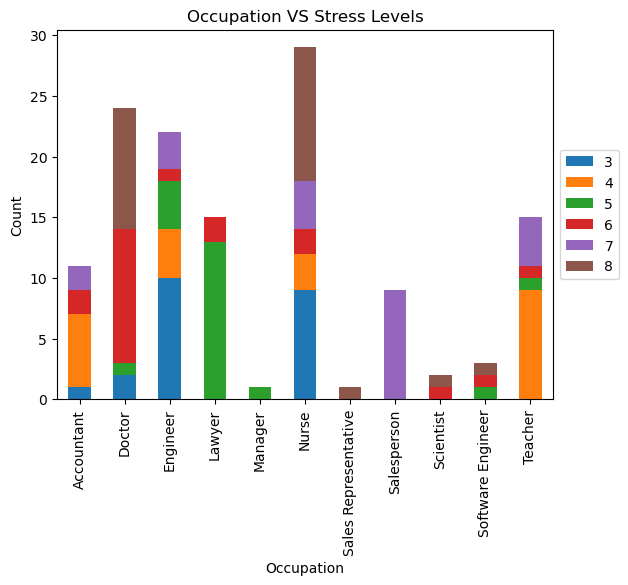

In [38]:
pd.crosstab(data_new['Occupation'], data_new['Stress Level']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation VS Stress Levels')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


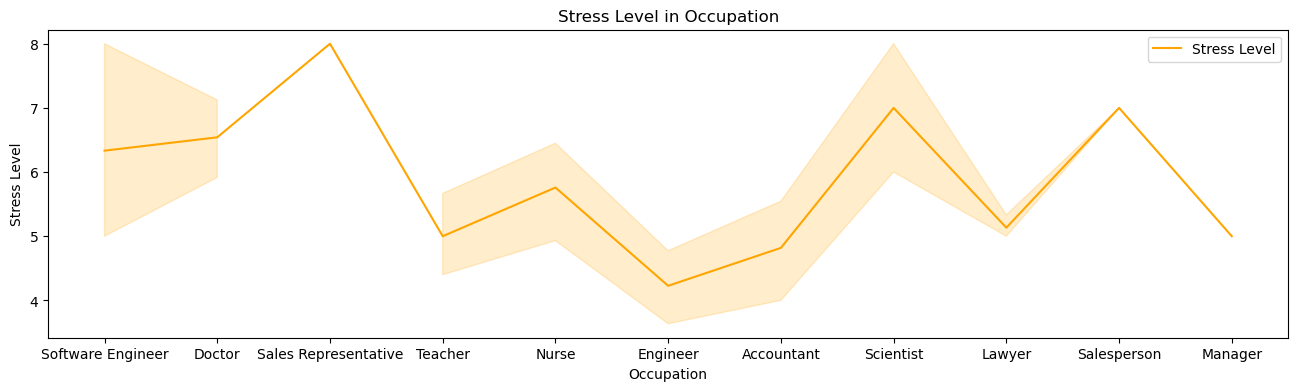

In [39]:
plt.figure(figsize=(16, 4))

sns.lineplot(data=data_new, x='Occupation', y='Stress Level', label='Stress Level', color='orange')
plt.title('Stress Level in Occupation')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.show()

### BMI

  BMI Category  Count
0       Normal     73
1   Overweight     52
2        Obese      7


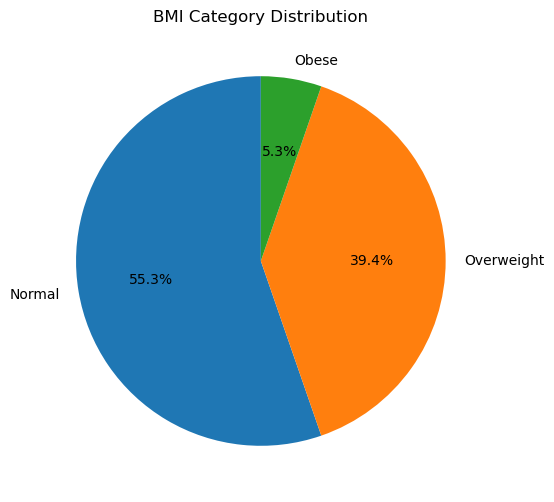

In [40]:
bmi_count = data_new['BMI Category'].value_counts().reset_index()
bmi_count.columns = ['BMI Category', 'Count']

print(bmi_count.head()) 

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(bmi_count['Count'], labels=bmi_count['BMI Category'], autopct='%1.1f%%', startangle=90)
plt.title('BMI Category Distribution')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


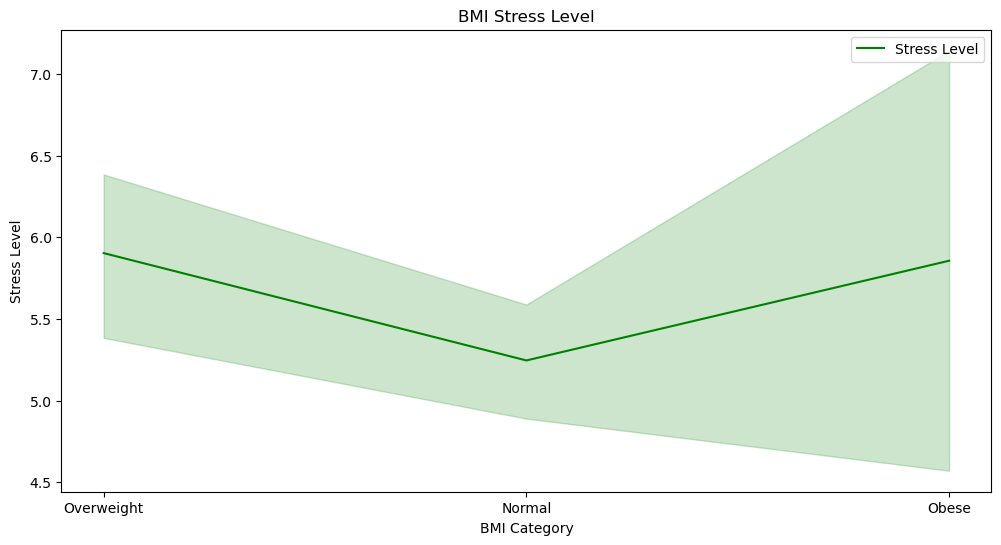

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_new, x='BMI Category', y='Stress Level', label='Stress Level', color='green')
plt.title('BMI Stress Level')
plt.xlabel('BMI Category')
plt.ylabel('Stress Level')
plt.show()

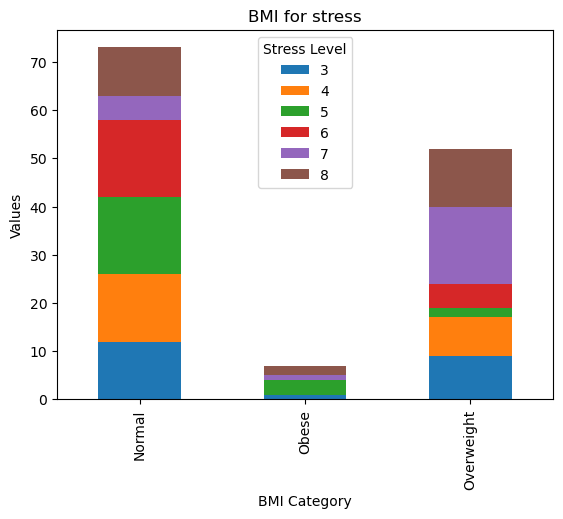

In [42]:
pd.crosstab(data_new['BMI Category'], data_new['Stress Level']).plot(kind='bar', stacked=True)
plt.title('BMI for stress')
plt.xlabel('BMI Category')
plt.ylabel('Values')
plt.show()

## Preprocessing

##

In [44]:
data_new

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None
360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
361,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [45]:
data_new = pd.concat([data_new, data_new['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
data_new = data_new.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
data_new['BloodPressure_Upper'] = data_new['BloodPressure_Upper'].astype(float)
data_new['BloodPressure_Lower'] = data_new['BloodPressure_Lower'].astype(float)

In [51]:
label_encoder = preprocessing.LabelEncoder()
data_new['Gender'] = label_encoder.fit_transform(data_new['Gender'])
data_new['Occupation'] = label_encoder.fit_transform(data_new['Occupation'])
data_new['BMI Category'] = label_encoder.fit_transform(data_new['BMI Category'])
data_new['Sleep Disorder'] = label_encoder.fit_transform(data_new['Sleep Disorder'])
data_new

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
Person ID,,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
4,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
6,1,28,9,5.9,4,30,8,1,85,3000,0,140.0,90.0
7,1,29,10,6.3,6,40,7,1,82,3500,0,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,59,5,8.0,9,75,3,2,68,7000,1,140.0,95.0
360,0,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0
361,0,59,5,8.2,9,75,3,2,68,7000,2,140.0,95.0


In [53]:
data_new.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BloodPressure_Upper        0
BloodPressure_Lower        0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


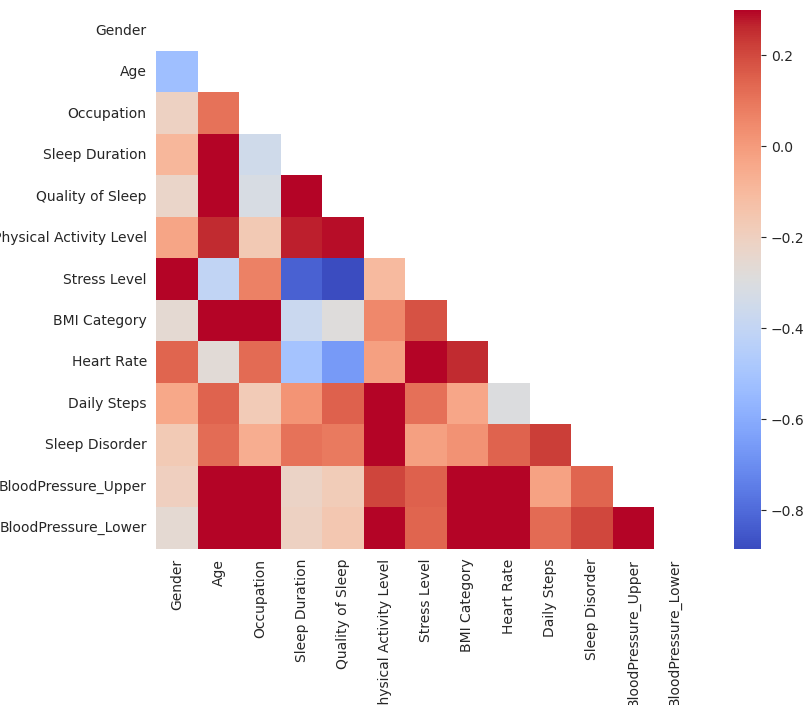

In [55]:
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = data_new.corr()
corr_vis(data_new.corr())

In [58]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.2 MB/s eta 0:00:00a 0:00:010m


In [112]:
# Prepare data
x = data_new.drop(['Sleep Disorder'], axis=1)
y = data_new['Sleep Disorder']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [113]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [114]:
lr_pred = lr.predict(x_test)

In [115]:
lr_report = classification_report(y_test, lr_pred)

print("[ Logistic Regression report ]\n")
print(lr_report)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.42      0.83      0.56         6
           1       0.86      0.71      0.77        17
           2       1.00      0.25      0.40         4

    accuracy                           0.67        27
   macro avg       0.76      0.60      0.58        27
weighted avg       0.78      0.67      0.67        27



In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

scaler_d = StandardScaler()
x_train_scaled = scaler_d.fit_transform(x_train)
x_test_scaled = scaler_d.transform(x_test)

lr_data = LogisticRegression()
rf_data = RandomForestClassifier()
gb_data = GradientBoostingClassifier()
xgb_data = XGBClassifier()

lr_data.fit(x_train_scaled, y_train)
rf_data.fit(x_train_scaled, y_train)
gb_data.fit(x_train_scaled, y_train)
xgb_data.fit(x_train_scaled, y_train)

lr_pred_data = lr_data.predict(x_test_scaled)
rf_pred_data = rf_data.predict(x_test_scaled)
gb_pred_data = gb_data.predict(x_test_scaled)
xgb_pred_data = xgb_data.predict(x_test_scaled)

In [135]:
lr_report = classification_report(y_test, lr_pred_data)

print('[ Logistic Regression]\n')
print(lr_report)

[ Logistic Regression]

              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.93      0.76      0.84        17
           2       0.67      0.50      0.57         4

    accuracy                           0.74        27
   macro avg       0.70      0.70      0.68        27
weighted avg       0.79      0.74      0.75        27



In [136]:
rf_report = classification_report(y_test, rf_pred_data)

print('[ Random Forest]\n')
print(rf_report)

[ Random Forest]

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.93      0.82      0.87        17
           2       0.50      0.50      0.50         4

    accuracy                           0.78        27
   macro avg       0.69      0.72      0.70        27
weighted avg       0.80      0.78      0.78        27



In [137]:
gb_report = classification_report(y_test, gb_pred_data)

print('[ Gradient Boost ]\n')
print(gb_report)

[ Gradient Boost ]

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.82      0.85        17
           2       0.50      0.75      0.60         4

    accuracy                           0.74        27
   macro avg       0.66      0.69      0.66        27
weighted avg       0.76      0.74      0.74        27



In [138]:
xgb_report = classification_report(y_test, xgb_pred_data)

print('[ XGBoost Classifier ]\n')
print(xgb_report)

[ XGBoost Classifier ]

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.93      0.82      0.87        17
           2       0.60      0.75      0.67         4

    accuracy                           0.81        27
   macro avg       0.75      0.80      0.77        27
weighted avg       0.84      0.81      0.82        27



In [139]:
lr_accuracy = accuracy_score(y_test, lr_pred_data)
rf_accuracy = accuracy_score(y_test, rf_pred_data)
gb_accuracy = accuracy_score(y_test, gb_pred_data)
xgb_accuracy = accuracy_score(y_test, xgb_pred_data)

accuracy_scores_result = [round(lr_accuracy, 2), round(rf_accuracy, 2), round(gb_accuracy, 2), round(xgb_accuracy, 2)]
print(accuracy_scores_result)

fig = px.line(x=['Logistic Regression','Random Forest','Gradient Boosting','XGB'], y=accuracy_scores_result)
fig.show()

[0.74, 0.78, 0.74, 0.81]


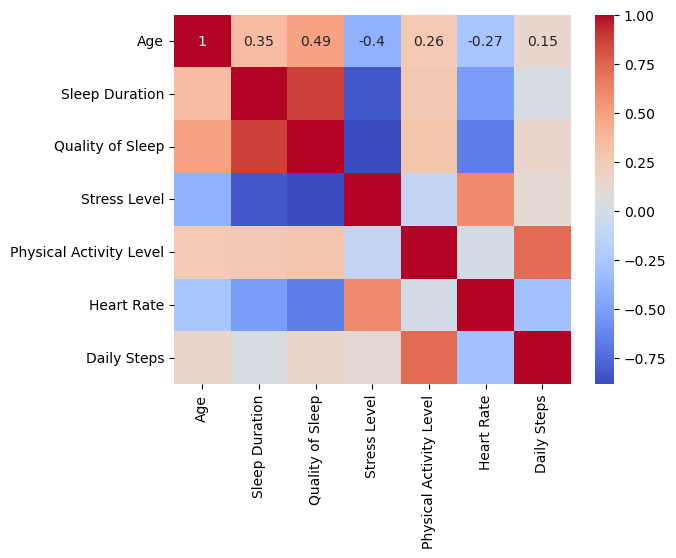

In [166]:
corr = data_new[['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                 'Physical Activity Level', 'Heart Rate', 'Daily Steps']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [217]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Mengurangi ke 2 dimensi
feature_scaled = StandardScaler().fit_transform(data_new[['Age', 'Sleep Duration', 
                                                          'Quality of Sleep', 
                                                          'Stress Level', 
                                                          'Physical Activity Level', 
                                                          'Heart Rate', 
                                                          'Daily Steps']])
pca_features = pca.fit_transform(feature_scaled)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



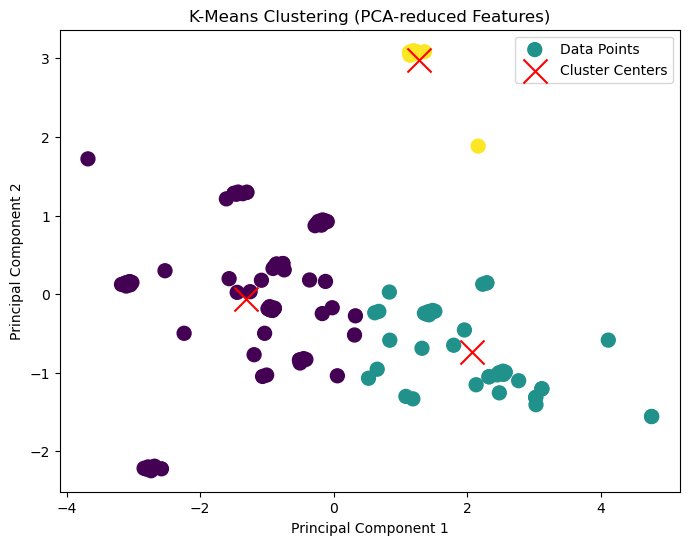

In [218]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_scaled) # Reduksi data jadi 2
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(reduced_features)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_kmeans, s=100, cmap='viridis', marker='o',label='Data Points')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='x', label='Cluster Centers')

plt.title('Clustering Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [226]:
pca_components = pd.DataFrame(pca.components_, columns=data_new.columns[:len(pca.components_[0])])

def top_contributions(pca_components, n=2):
    for i, component in enumerate(pca_components.values):
        sorted_idx = np.argsort(np.abs(component))[-n:]
        print(f"Principal Component {i + 1}:")
        for idx in sorted_idx[::-1]:  
            print(f"  {pca_components.columns[idx]}: {component[idx]:.6f}")

top_contributions(pca_components)


Principal Component 1:
  Occupation: -0.511797
  Sleep Duration: 0.470566
Principal Component 2:
  Stress Level: 0.696532
  Quality of Sleep: 0.640598


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of

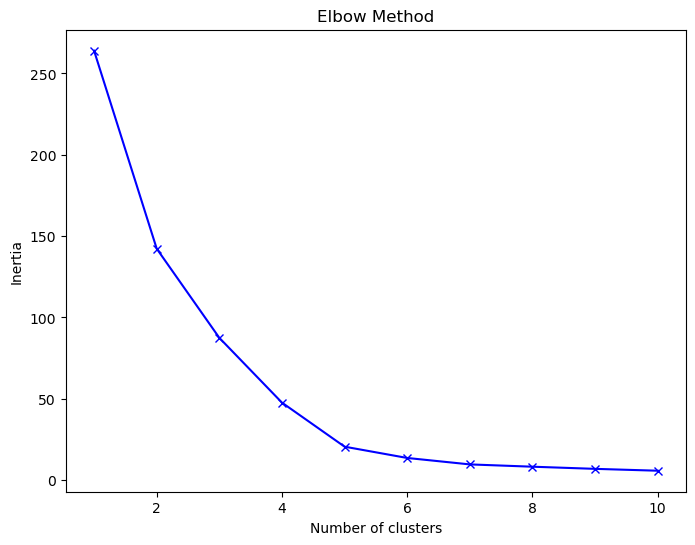

In [232]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(feature_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
